<a href="https://colab.research.google.com/github/eridanletalis/geeckbrains_data_base/blob/master/mysql_hw_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Урок 5. SQL – оконные функции </h2>


1. Создайте представление, в которое попадет информация о пользователях (имя, фамилия,
город и пол), которые не старше 20 лет.


<code>
CREATE OR REPLACE VIEW less_than_20 AS ( <br />
SELECT CONCAT(u.firstname, ' ', u.lastname) name<br />
,&nbsp;&nbsp;&nbsp;&nbsp;CASE&nbsp;&nbsp;&nbsp;WHEN pf.gender = 'f' THEN 'Woman'<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;WHEN pf.gender = 'm' THEN 'Man'<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;ELSE 'NA'<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;END AS sex<br />
,	&nbsp;&nbsp;&nbsp;&nbsp;u.hometown<br />
FROM profiles pf<br />
JOIN users usr ON usr.id = pf.user_id<br />
WHERE DATE_ADD(SYSDATE(), INTERVAL -20 YEAR) < pf.birthday<br />
);
</code>

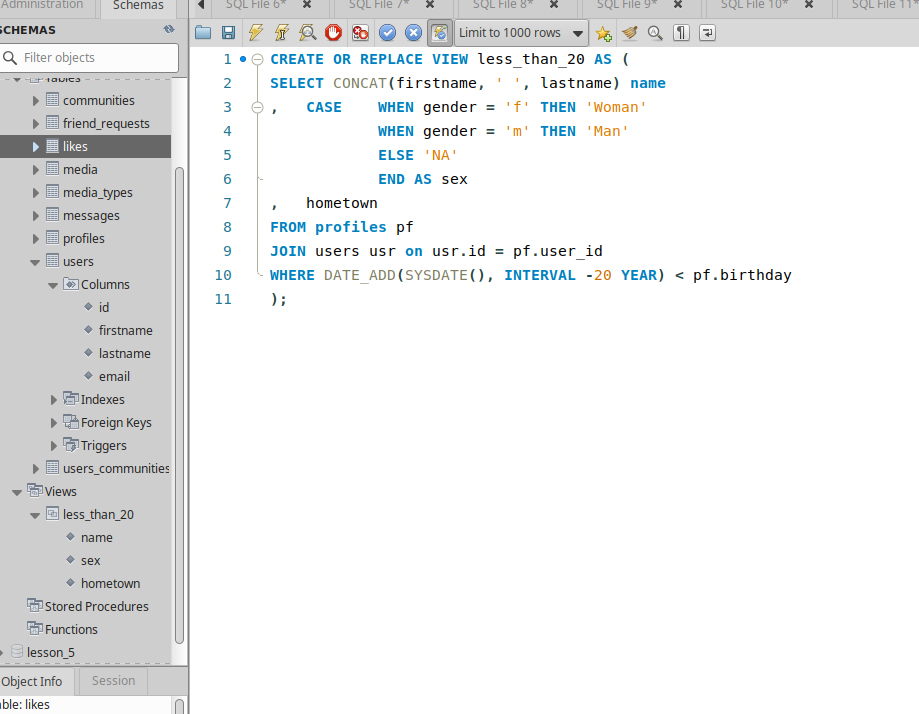

2. Найдите кол-во, отправленных сообщений каждым пользователем и выведите
ранжированный список пользователей, указав имя и фамилию пользователя, количество
отправленных сообщений и место в рейтинге (первое место у пользователя с максимальным
количеством сообщений) . (используйте DENSE_RANK)


<code>
WITH user_message_cnt AS(<br />
&nbsp;&nbsp;&nbsp;&nbsp;SELECT DISTINCT<br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;msg.from_user_id user_id <br />
,&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;COUNT(*) OVER (PARTITION BY msg.from_user_id) cnt<br />
&nbsp;&nbsp;&nbsp;&nbsp;FROM messages msg)<br />
<br />
SELECT <br />
&nbsp;&nbsp;&nbsp;&nbsp;CONCAT(usr.firstname, ' ', usr.lastname) name<br />
,&nbsp;&nbsp;&nbsp;&nbsp;msg_cnt.cnt<br />
,&nbsp;&nbsp;&nbsp;&nbsp;DENSE_RANK() OVER (ORDER BY cnt DESC) rn<br />
FROM user_message_cnt msg_cnt<br />
JOIN users usr ON usr.id = msg_cnt.user_id;<br />
</code>

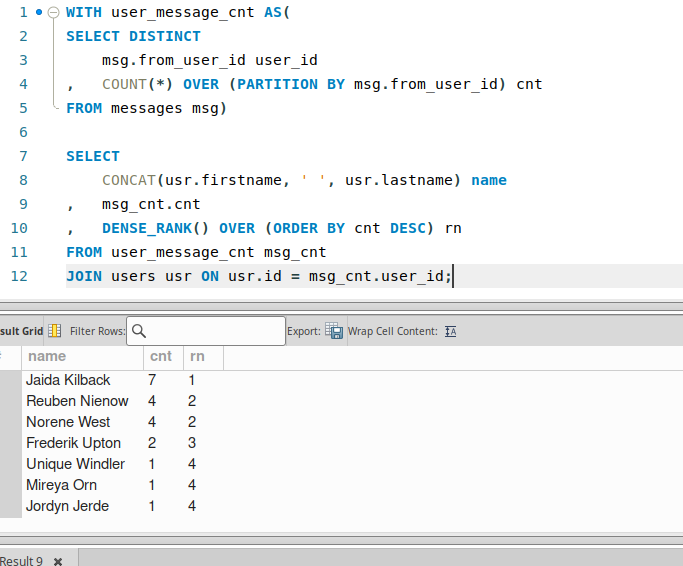

3. Выберите все сообщения, отсортируйте сообщения по возрастанию даты отправления
(created_at) и найдите разницу дат отправления между соседними сообщениями,
получившегося списка. (используйте LEAD или LAG)

<code>
SELECT <br />
&nbsp;&nbsp;&nbsp;&nbsp;msg.*<br />
,&nbsp;&nbsp;&nbsp;&nbsp;TIMESTAMPDIFF(minute, <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;msg.created_at, <br />
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LEAD(msg.created_at, 1, msg.created_at) OVER msg_sort_order) date_diff<br />
FROM messages msg<br />
WINDOW msg_sort_order AS (ORDER BY created_at)<br />
ORDER BY created_at;<br />
</code>

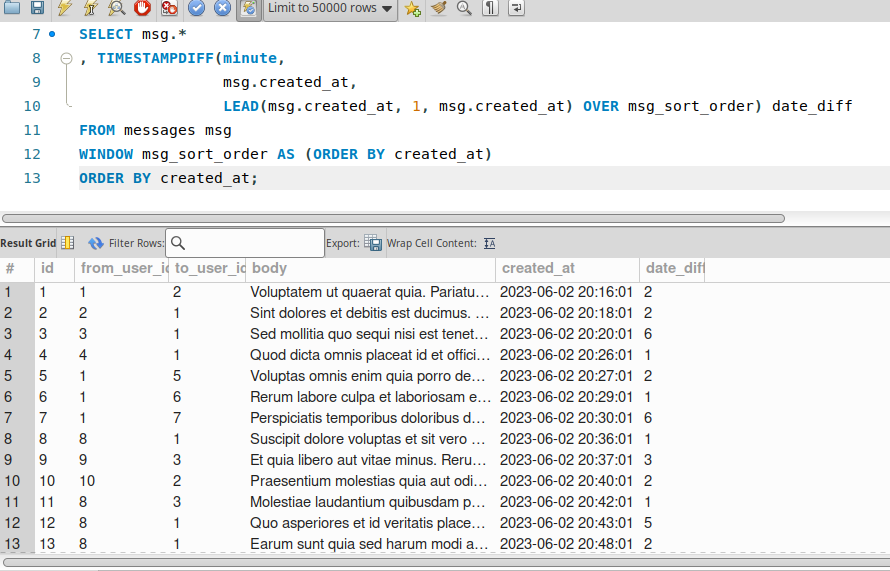